In [2]:
%load_ext autoreload
%autoreload 2

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import eleanor
import lightkurve as lk
from astropy.wcs import WCS

In [32]:
star = eleanor.Source(tic=120362128, sector=14, tc=True)
star.premade = False
sc = lk.search_targetpixelfile(target='tic120362128', sector=14).download()
sq = sc.quality < 5000
start = 2500
end = 3400
time = sc.time[sq][start:end].value
tpfs = sc.flux[sq][start:end].value
errs = sc.flux_err[sq][start:end].value
bkgs = sc.flux_bkg[sq,0,0][start:end].value
bkg0 = np.mean(bkgs)
data = eleanor.TargetData(
    star, 
    height=13, 
    width=13, 
    do_pca=True, 
    do_psf=False,
    time_arr=time, 
    data_arr=tpfs, 
    err_arr=errs, 
    bkg_arr=bkgs, 
)

In [35]:
photometry_flux = sc.to_lightcurve().flux[sq][start:end]
data.psf_lightcurve(flux_arr=photometry_flux.value, model_name='Gaussian', bkg_mag_cutoff=10, verbose=True)

256013842109.6653
256013842842.88483
256013842720.92606
256013843673.37686
256013836459.08368
256013843172.25992
256013843498.27267
256013843536.4004
256013840319.6879
256013839692.82925
256013838522.32657
256013837999.91125
256013836498.1921
256013834517.08588
256013830345.83356
256013831353.18466
256013831349.86777
256013829398.8243
256013824126.0835
256013826178.09946
256013824451.22388
256013822288.35553
256013815424.69333
256013816150.3143
256013816568.23038
256013812563.4712
256013803716.1202
256013806064.13922
256013803880.0719
256013800619.60837
256013788445.4873
256013789516.29294
256013789978.60727
256013783313.48767
256013768012.2919
256013770703.24283
256013769868.37283
256013762896.79446
256013743137.62863
256013746367.9813
256013745892.15552
256013734343.18204
256013710120.12283
256013714433.95355
256013715617.9164
256013701682.28973
256013672092.43066
256013676086.3315
256013678284.00876
256013661811.67276
256013630463.66888
256013635966.23358
256013634795.9035
256013619

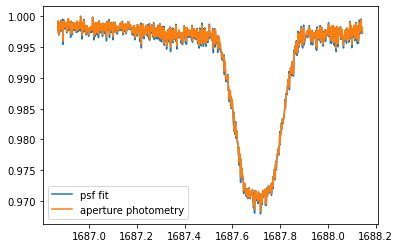

In [37]:
plt.plot(time, data.psf_flux[:end-start] / np.max(data.psf_flux[:end-start]), label='psf fit')
plt.plot(time, photometry_flux / np.max(photometry_flux), label='aperture photometry')
plt.legend()
plt.show()

In [27]:
q = eleanor.mast.gaia_sources_in_tpf(star, 10, [11, 11])

In [30]:
star.coords

[284.926069422759, 36.551035172622]

In [28]:
q.columns

Index(['RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx',
       'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'FG', 'e_FG',
       'Gmag', 'e_Gmag', 'FBP', 'e_FBP', 'BPmag', 'e_BPmag', 'FRP', 'e_FRP',
       'RPmag', 'e_RPmag', 'BP-RP', 'RV', 'e_RV', 'Teff', 'AG', 'E_BP-RP_',
       'Rad', 'Lum', 'coords_x', 'coords_y'],
      dtype='object')

In [29]:
q.Source

213    2093003465318998272
257    2093003671477427584
270    2093003675779400960
Name: Source, dtype: int64